In [49]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [50]:
df=pd.read_csv('grocery_sales_v1.csv')

In [51]:
df

,order_id,customer_name,new_order_date,order_year,month_name,order_month,order_day,category,sub_category,net_sales,discount,profit,total_sales,profit_percentage,region,city
0,OD1,Harish,2017-11-08,2017,November,11,8,Oil & Masala,Masalas,852.72,0.12,401.28,1254,47.058824,North,Vellore
1,OD2,Sudha,2017-11-08,2017,November,11,8,Beverages,Health Drinks,599.20,0.18,149.80,749,25.000000,South,Krishnagiri
2,OD3,Hussain,2017-06-12,2017,June,6,12,Food Grains,Atta & Flour,2194.80,0.21,165.20,2360,7.526882,West,Perambalur
3,OD4,Jackson,2016-10-11,2016,October,10,11,Fruits & Veggies,Fresh Vegetables,806.40,0.25,89.60,896,11.111111,South,Dharmapuri
4,OD5,Ridhesh,2016-10-11,2016,October,10,11,Food Grains,Organic Staples,1436.55,0.26,918.45,2355,63.934426,South,Ooty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,2015-12-24,2015,December,12,24,"Eggs, Meat & Fish",Eggs,585.90,0.16,359.10,945,61.290323,West,Madurai
9990,OD9991,Alan,2015-07-12,2015,July,7,12,Bakery,Biscuits,1123.30,0.26,71.70,1195,6.382979,West,Kanyakumari
9991,OD9992,Ravi,2017-06-06,2017,June,6,6,Food Grains,Rice,1065.56,0.16,501.44,1567,47.058824,West,Bodi
9992,OD9993,Peer,2018-10-16,2018,October,10,16,Oil & Masala,Spices,1061.76,0.15,597.24,1659,56.250000,West,Pudukottai


In [52]:
df.drop(columns=['order_id'], inplace=True)

In [53]:
df.rename(columns={'order_year': 'year','month_name' :'month','order_day':'day'}, inplace=True)

In [54]:
df

,customer_name,new_order_date,year,month,order_month,day,category,sub_category,net_sales,discount,profit,total_sales,profit_percentage,region,city
0,Harish,2017-11-08,2017,November,11,8,Oil & Masala,Masalas,852.72,0.12,401.28,1254,47.058824,North,Vellore
1,Sudha,2017-11-08,2017,November,11,8,Beverages,Health Drinks,599.20,0.18,149.80,749,25.000000,South,Krishnagiri
2,Hussain,2017-06-12,2017,June,6,12,Food Grains,Atta & Flour,2194.80,0.21,165.20,2360,7.526882,West,Perambalur
3,Jackson,2016-10-11,2016,October,10,11,Fruits & Veggies,Fresh Vegetables,806.40,0.25,89.60,896,11.111111,South,Dharmapuri
4,Ridhesh,2016-10-11,2016,October,10,11,Food Grains,Organic Staples,1436.55,0.26,918.45,2355,63.934426,South,Ooty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,2015-12-24,2015,December,12,24,"Eggs, Meat & Fish",Eggs,585.90,0.16,359.10,945,61.290323,West,Madurai
9990,Alan,2015-07-12,2015,July,7,12,Bakery,Biscuits,1123.30,0.26,71.70,1195,6.382979,West,Kanyakumari
9991,Ravi,2017-06-06,2017,June,6,6,Food Grains,Rice,1065.56,0.16,501.44,1567,47.058824,West,Bodi
9992,Peer,2018-10-16,2018,October,10,16,Oil & Masala,Spices,1061.76,0.15,597.24,1659,56.250000,West,Pudukottai


In [10]:
df.columns

Index(['customer_name', 'year', 'month', 'day', 'category', 'sub_category',
       'net_sales', 'discount', 'profit', 'total_sales', 'profit_percentage',
       'region', 'city'],
      dtype='object')

In [25]:
df.isna().mean()*100

customer_name        0.0
year                 0.0
month                0.0
day                  0.0
category             0.0
sub_category         0.0
net_sales            0.0
discount             0.0
profit               0.0
total_sales          0.0
profit_percentage    0.0
region               0.0
city                 0.0
dtype: float64

### 1. What is the overall sales trend for the grocery store over the years?

In [11]:
sales_by_year = df.groupby(df['year'])['total_sales'].sum()


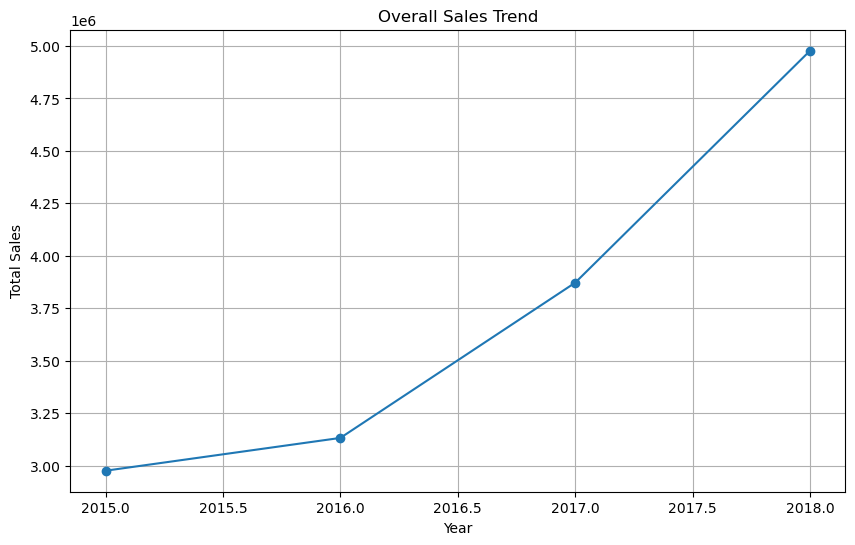

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Overall Sales Trend')
plt.grid(True)
plt.show()

### 2. Which month(s) had the highest sales and profit? Are there any seasonal patterns?

In [13]:
sales_by_month = df.groupby('month')['total_sales'].sum()
profit_by_month = df.groupby('month')['profit'].sum()


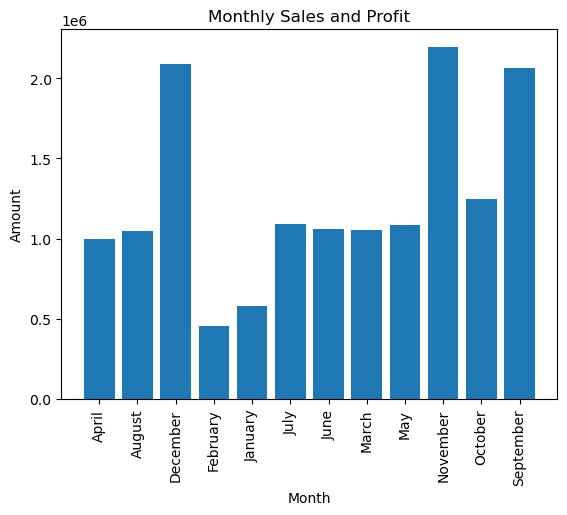

In [26]:
plt.bar(sales_by_month.index, sales_by_month.values)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Sales and Profit')
plt.xticks(rotation=90)
plt.show()

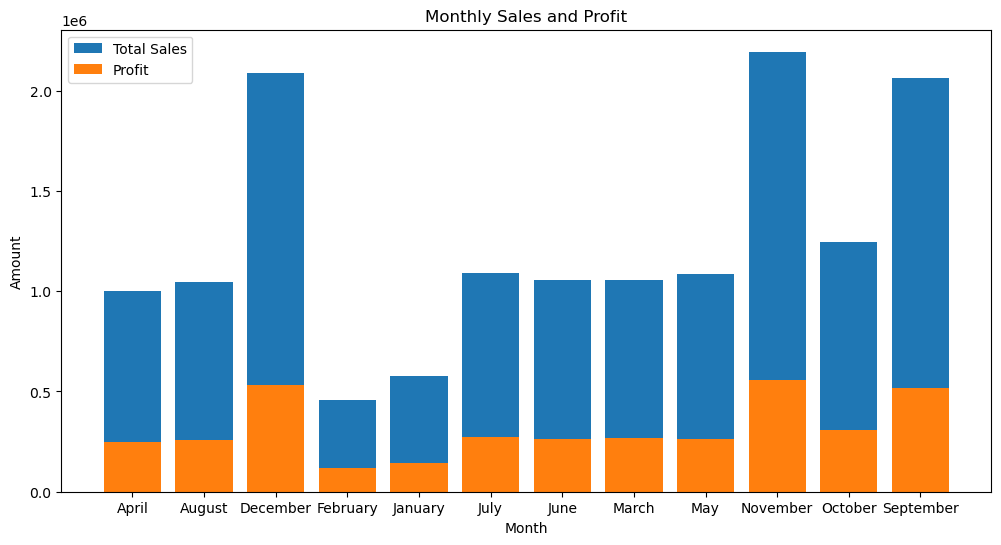

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(sales_by_month.index, sales_by_month.values, label='Total Sales')
ax.bar(profit_by_month.index, profit_by_month.values, label='Profit')
ax.set_xlabel('Month')
ax.set_ylabel('Amount')
ax.set_title('Monthly Sales and Profit')
ax.legend()
plt.show()


### 3. What are the top-selling categories and sub-categories of products?

In [16]:
sales_by_category = df.groupby(['category', 'sub_category'])['total_sales'].sum()


In [18]:
top_selling = sales_by_category.sort_values(ascending=False)
print(top_selling.head(10))


category      sub_category 
Beverages     Health Drinks    1051439
              Soft Drinks      1033874
Snacks        Cookies           768213
Bakery        Breads & Buns     742586
Snacks        Noodles           735435
              Chocolates        733898
Oil & Masala  Masalas           697480
Bakery        Cakes             685612
              Biscuits          684083
Oil & Masala  Spices            672876
Name: total_sales, dtype: int64


### 4. Which region and city have the highest sales and profit?

In [19]:
sales_profit_by_location = df.groupby(['region', 'city'])[['total_sales', 'profit']].sum()


In [20]:
highest_sales = sales_profit_by_location['total_sales'].idxmax()
highest_profit = sales_profit_by_location['profit'].idxmax()


In [21]:
print("Highest Sales Location:", highest_sales)
print("Highest Profit Location:", highest_profit)


Highest Sales Location: ('West', 'Bodi')
Highest Profit Location: ('West', 'Bodi')


### 5. Is there a correlation between discounts offered and net sales? How does it affect profitability?

In [22]:
correlation = df['discount'].corr(df['net_sales'])
print("Correlation between Discounts and Net Sales:", correlation)


Correlation between Discounts and Net Sales: -0.006745339069645266


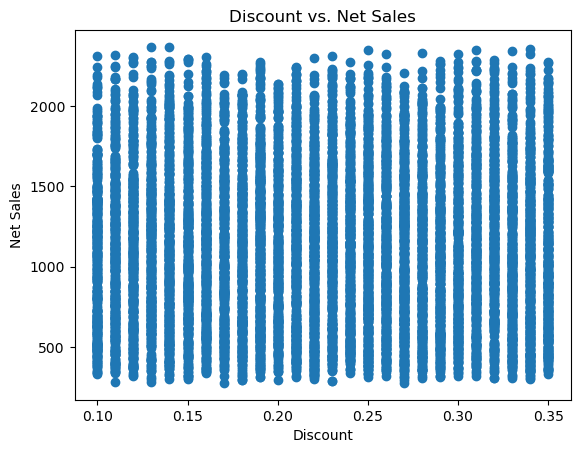

In [23]:
plt.scatter(df['discount'], df['net_sales'])
plt.xlabel('Discount')
plt.ylabel('Net Sales')
plt.title('Discount vs. Net Sales')
plt.show()


In [24]:
profit_without_discount = df[df['discount'] == 0]['profit'].mean()
profit_with_discount = df[df['discount'] > 0]['profit'].mean()

print("Average Profit without Discount:", profit_without_discount)
print("Average Profit with Discount:", profit_with_discount)


Average Profit without Discount: nan
Average Profit with Discount: 374.9370822493496


### 6. Are there any specific customers who consistently contribute to high sales and profit?

In [27]:
sales_profit_by_customer = df.groupby('customer_name')[['total_sales', 'profit']].sum()


In [28]:
top_customers = sales_profit_by_customer.sort_values(by='total_sales', ascending=False)


In [29]:
print(top_customers.head(10))


               total_sales    profit
customer_name                       
Krithika            334361  85633.03
Amrish              333351  80191.89
Verma               331665  79096.53
Arutra              325720  87572.40
Vidya               321798  86725.64
Vinne               319565  79873.12
Shah                318588  73786.22
Suresh              315973  77450.88
Adavan              315341  78044.29
Surya               312645  80996.85


### 7. How does the profit percentage vary across different categories and sub-categories?

In [30]:
df['profit_percentage'] = (df['profit'] / df['total_sales']) * 100


In [31]:
avg_profit_percentage = df.groupby(['category', 'sub_category'])['profit_percentage'].mean()


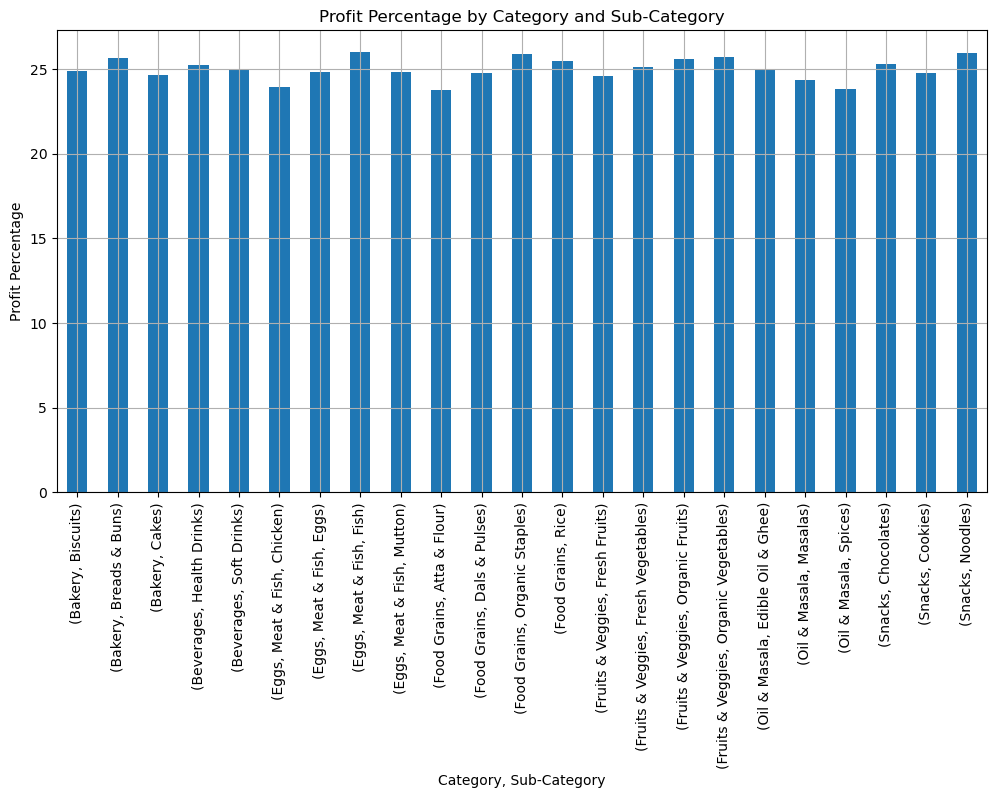

In [35]:
avg_profit_percentage.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Category, Sub-Category')
plt.ylabel('Profit Percentage')
plt.title('Profit Percentage by Category and Sub-Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 8. Are there any outliers or anomalies in the dataset that need to be investigated?

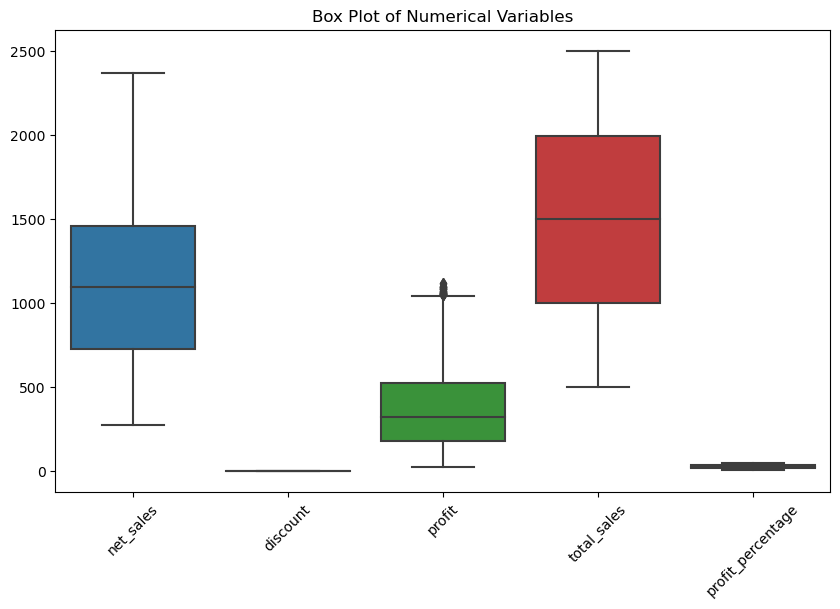

In [36]:
numeric_columns = ['net_sales', 'discount', 'profit', 'total_sales', 'profit_percentage']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Variables')
plt.show()


In [38]:
threshold = 900
outliers = df[df['profit'] > threshold]
print(outliers)


     customer_name  year      month  day          category     sub_category  \
4          Ridhesh  2016    October   11       Food Grains  Organic Staples   
43          Mathew  2018  September   19            Snacks          Cookies   
71           Yusuf  2018  September   14            Snacks          Noodles   
80           Kumar  2017       June   12         Beverages    Health Drinks   
100         Adavan  2017     August   29            Bakery            Cakes   
...            ...   ...        ...  ...               ...              ...   
9865         Hafiz  2016   November    9  Fruits & Veggies   Organic Fruits   
9911         Yusuf  2018   December    1      Oil & Masala           Spices   
9924      Krithika  2018     August   17            Bakery            Cakes   
9948        Esther  2016    October   19       Food Grains     Atta & Flour   
9952           Amy  2015      April    8      Oil & Masala           Spices   

      net_sales  discount   profit  total_sales  pr

### 9. Can we identify any trends or patterns in the top 5 customer behavior based on their purchase history?

In [39]:
customer_sales_by_year = df.groupby(['customer_name', 'year'])['total_sales'].sum()


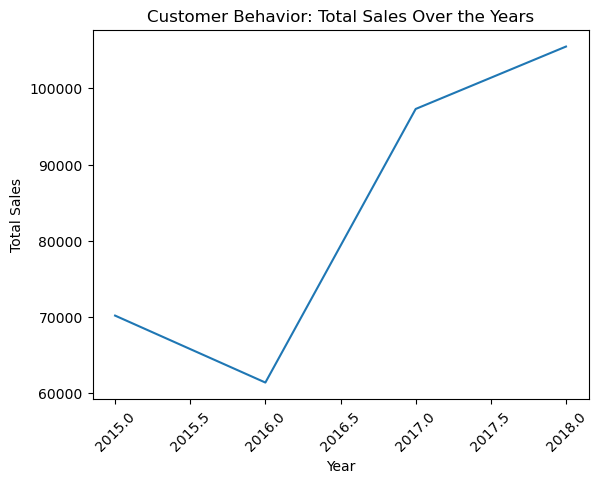

In [41]:
customer_name = 'Krithika'
customer_sales = customer_sales_by_year.loc[customer_name]

plt.plot(customer_sales.index, customer_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Customer Behavior: Total Sales Over the Years')
plt.xticks(rotation=45)
plt.show()


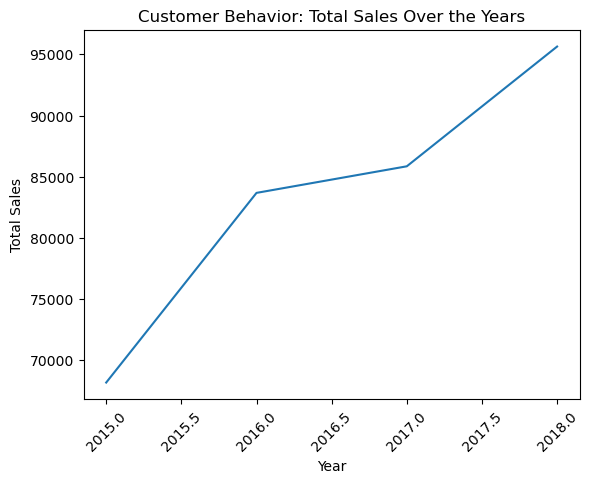

In [42]:
customer_name = 'Amrish'
customer_sales = customer_sales_by_year.loc[customer_name]

plt.plot(customer_sales.index, customer_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Customer Behavior: Total Sales Over the Years')
plt.xticks(rotation=45)
plt.show()

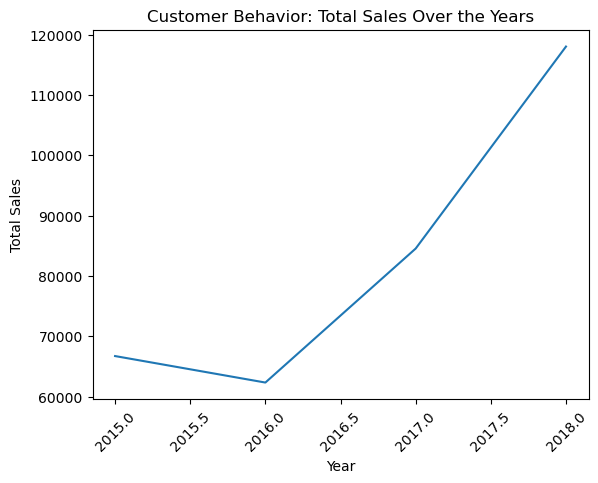

In [44]:
customer_name = 'Verma'
customer_sales = customer_sales_by_year.loc[customer_name]

plt.plot(customer_sales.index, customer_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Customer Behavior: Total Sales Over the Years')
plt.xticks(rotation=45)
plt.show()

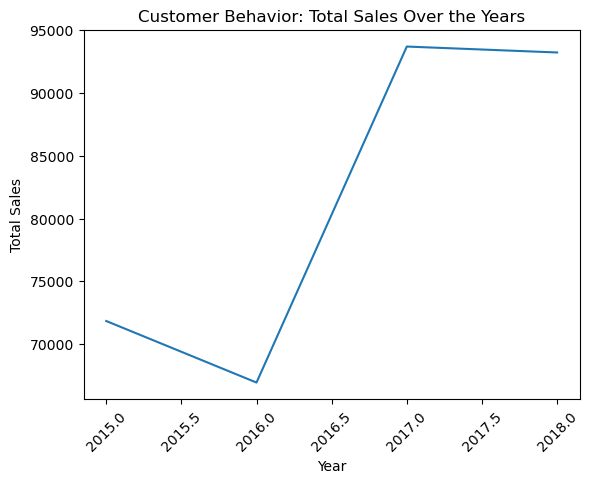

In [45]:
customer_name = 'Arutra'
customer_sales = customer_sales_by_year.loc[customer_name]

plt.plot(customer_sales.index, customer_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Customer Behavior: Total Sales Over the Years')
plt.xticks(rotation=45)
plt.show()

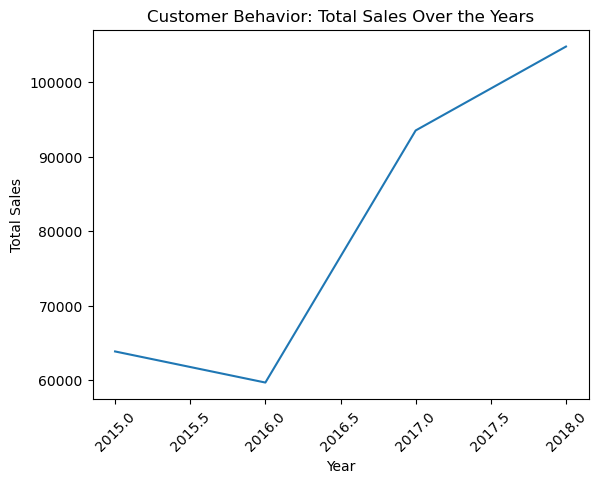

In [46]:
customer_name = 'Vidya'
customer_sales = customer_sales_by_year.loc[customer_name]

plt.plot(customer_sales.index, customer_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Customer Behavior: Total Sales Over the Years')
plt.xticks(rotation=45)
plt.show()

### 10. Are there any significant differences in sales and profit between weekdays and weekends?

In [55]:
df

,customer_name,new_order_date,year,month,order_month,day,category,sub_category,net_sales,discount,profit,total_sales,profit_percentage,region,city
0,Harish,2017-11-08,2017,November,11,8,Oil & Masala,Masalas,852.72,0.12,401.28,1254,47.058824,North,Vellore
1,Sudha,2017-11-08,2017,November,11,8,Beverages,Health Drinks,599.20,0.18,149.80,749,25.000000,South,Krishnagiri
2,Hussain,2017-06-12,2017,June,6,12,Food Grains,Atta & Flour,2194.80,0.21,165.20,2360,7.526882,West,Perambalur
3,Jackson,2016-10-11,2016,October,10,11,Fruits & Veggies,Fresh Vegetables,806.40,0.25,89.60,896,11.111111,South,Dharmapuri
4,Ridhesh,2016-10-11,2016,October,10,11,Food Grains,Organic Staples,1436.55,0.26,918.45,2355,63.934426,South,Ooty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,2015-12-24,2015,December,12,24,"Eggs, Meat & Fish",Eggs,585.90,0.16,359.10,945,61.290323,West,Madurai
9990,Alan,2015-07-12,2015,July,7,12,Bakery,Biscuits,1123.30,0.26,71.70,1195,6.382979,West,Kanyakumari
9991,Ravi,2017-06-06,2017,June,6,6,Food Grains,Rice,1065.56,0.16,501.44,1567,47.058824,West,Bodi
9992,Peer,2018-10-16,2018,October,10,16,Oil & Masala,Spices,1061.76,0.15,597.24,1659,56.250000,West,Pudukottai


In [67]:
df['day'] = pd.to_datetime(df['new_order_date'])
df['weekday'] = df['day'].dt.dayofweek

In [66]:
df

,customer_name,new_order_date,year,month,order_month,day,category,sub_category,net_sales,discount,profit,total_sales,profit_percentage,region,city,weekday
0,Harish,2017-11-08,2017,November,11,2017-11-08,Oil & Masala,Masalas,852.72,0.12,401.28,1254,47.058824,North,Vellore,2
1,Sudha,2017-11-08,2017,November,11,2017-11-08,Beverages,Health Drinks,599.20,0.18,149.80,749,25.000000,South,Krishnagiri,2
2,Hussain,2017-06-12,2017,June,6,2017-06-12,Food Grains,Atta & Flour,2194.80,0.21,165.20,2360,7.526882,West,Perambalur,0
3,Jackson,2016-10-11,2016,October,10,2016-10-11,Fruits & Veggies,Fresh Vegetables,806.40,0.25,89.60,896,11.111111,South,Dharmapuri,1
4,Ridhesh,2016-10-11,2016,October,10,2016-10-11,Food Grains,Organic Staples,1436.55,0.26,918.45,2355,63.934426,South,Ooty,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,2015-12-24,2015,December,12,2015-12-24,"Eggs, Meat & Fish",Eggs,585.90,0.16,359.10,945,61.290323,West,Madurai,3
9990,Alan,2015-07-12,2015,July,7,2015-07-12,Bakery,Biscuits,1123.30,0.26,71.70,1195,6.382979,West,Kanyakumari,6
9991,Ravi,2017-06-06,2017,June,6,2017-06-06,Food Grains,Rice,1065.56,0.16,501.44,1567,47.058824,West,Bodi,1
9992,Peer,2018-10-16,2018,October,10,2018-10-16,Oil & Masala,Spices,1061.76,0.15,597.24,1659,56.250000,West,Pudukottai,1


In [68]:
df.weekday.replace({0:'Sunday', 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}, inplace=True)

In [69]:
df

,customer_name,new_order_date,year,month,order_month,day,category,sub_category,net_sales,discount,profit,total_sales,profit_percentage,region,city,weekday
0,Harish,2017-11-08,2017,November,11,2017-11-08,Oil & Masala,Masalas,852.72,0.12,401.28,1254,47.058824,North,Vellore,Tuesday
1,Sudha,2017-11-08,2017,November,11,2017-11-08,Beverages,Health Drinks,599.20,0.18,149.80,749,25.000000,South,Krishnagiri,Tuesday
2,Hussain,2017-06-12,2017,June,6,2017-06-12,Food Grains,Atta & Flour,2194.80,0.21,165.20,2360,7.526882,West,Perambalur,Sunday
3,Jackson,2016-10-11,2016,October,10,2016-10-11,Fruits & Veggies,Fresh Vegetables,806.40,0.25,89.60,896,11.111111,South,Dharmapuri,Monday
4,Ridhesh,2016-10-11,2016,October,10,2016-10-11,Food Grains,Organic Staples,1436.55,0.26,918.45,2355,63.934426,South,Ooty,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,2015-12-24,2015,December,12,2015-12-24,"Eggs, Meat & Fish",Eggs,585.90,0.16,359.10,945,61.290323,West,Madurai,Wednesday
9990,Alan,2015-07-12,2015,July,7,2015-07-12,Bakery,Biscuits,1123.30,0.26,71.70,1195,6.382979,West,Kanyakumari,Saturday
9991,Ravi,2017-06-06,2017,June,6,2017-06-06,Food Grains,Rice,1065.56,0.16,501.44,1567,47.058824,West,Bodi,Monday
9992,Peer,2018-10-16,2018,October,10,2018-10-16,Oil & Masala,Spices,1061.76,0.15,597.24,1659,56.250000,West,Pudukottai,Monday


In [70]:
sales_profit_by_weekday = df.groupby('weekday')[['total_sales', 'profit']].sum()


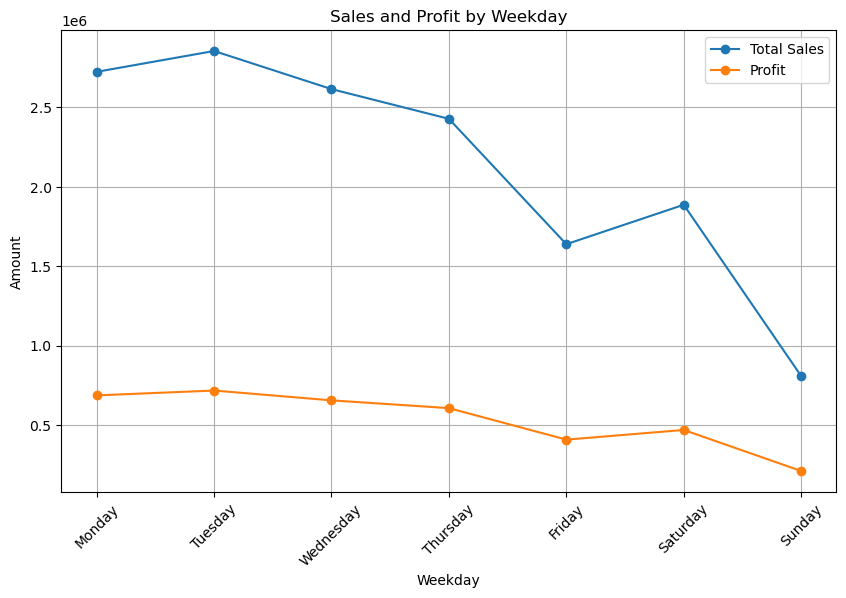

In [71]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_ticks = range(7)

plt.figure(figsize=(10, 6))
plt.plot(weekday_ticks, sales_profit_by_weekday['total_sales'], marker='o', label='Total Sales')
plt.plot(weekday_ticks, sales_profit_by_weekday['profit'], marker='o', label='Profit')
plt.xlabel('Weekday')
plt.ylabel('Amount')
plt.title('Sales and Profit by Weekday')
plt.xticks(weekday_ticks, weekday_labels, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### 11. How does the profit margin vary across different regions and cities?

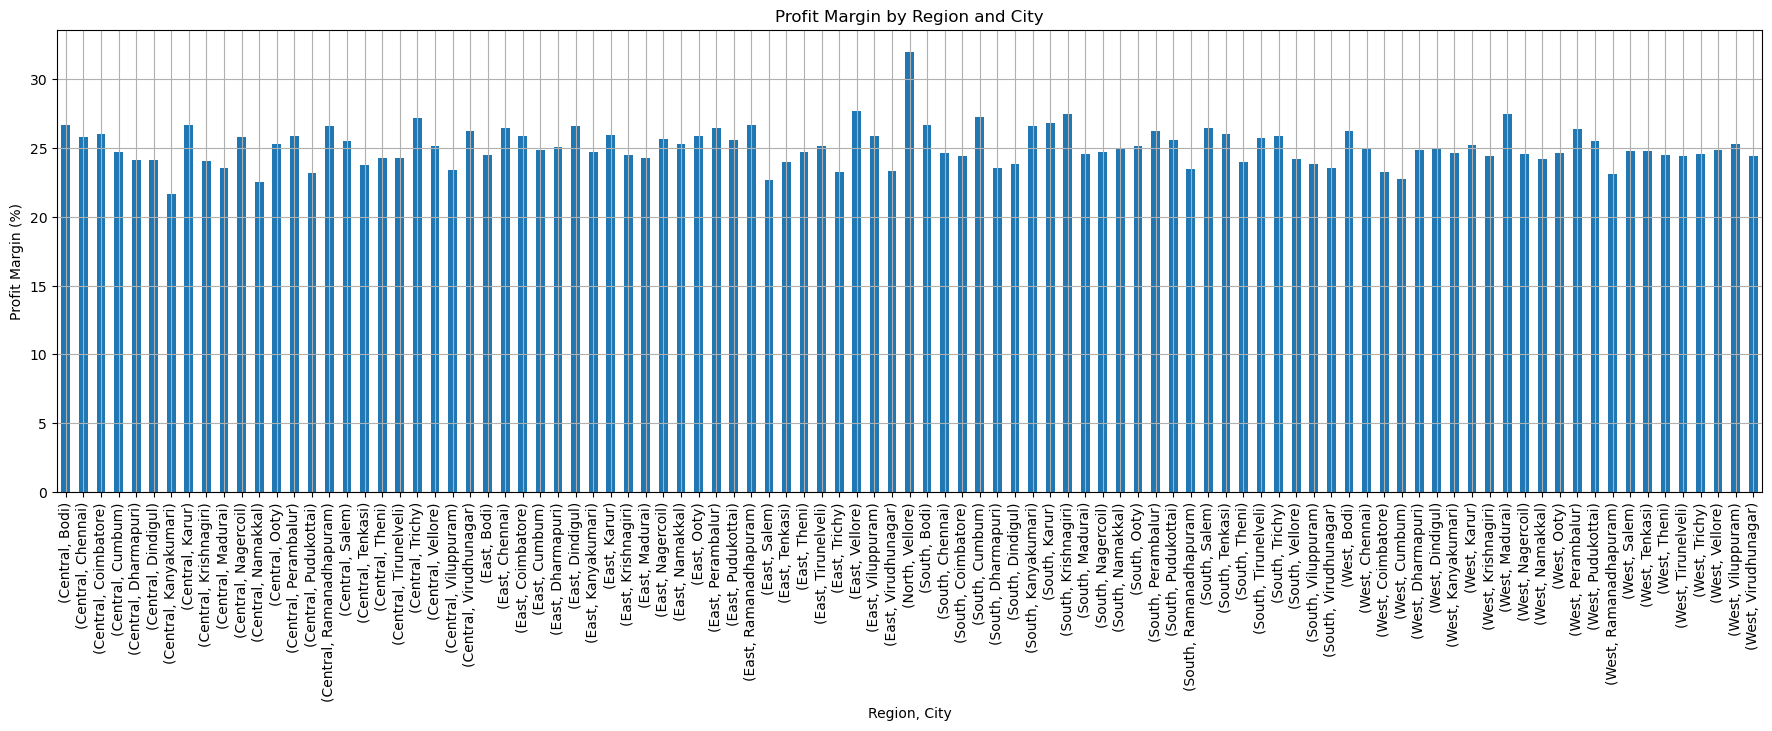

In [75]:
df['profit_margin'] = (df['profit'] / df['total_sales']) * 100
avg_profit_margin = df.groupby(['region', 'city'])['profit_margin'].mean()
plt.figure(figsize=(22, 6))
avg_profit_margin.plot(kind='bar')
plt.xlabel('Region, City')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin by Region and City')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 12. Are there any specific categories or sub-categories that contribute significantly to the overall profit?

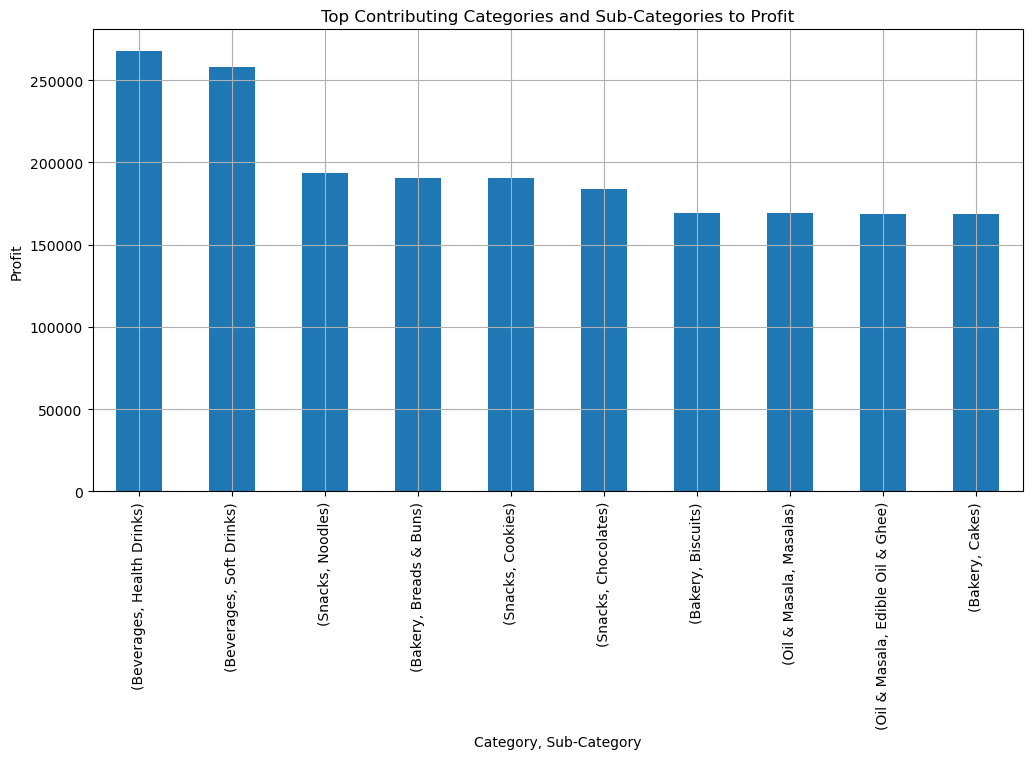

In [77]:
profit_by_category_subcategory = df.groupby(['category', 'sub_category'])['profit'].sum()
profit_by_category_subcategory = profit_by_category_subcategory.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
profit_by_category_subcategory.head(10).plot(kind='bar')
plt.xlabel('Category, Sub-Category')
plt.ylabel('Profit')
plt.title('Top Contributing Categories and Sub-Categories to Profit')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 13. Is there a relationship between the total sales and the profit generated?

In [78]:
total_sales = df['total_sales']
profit = df['profit']


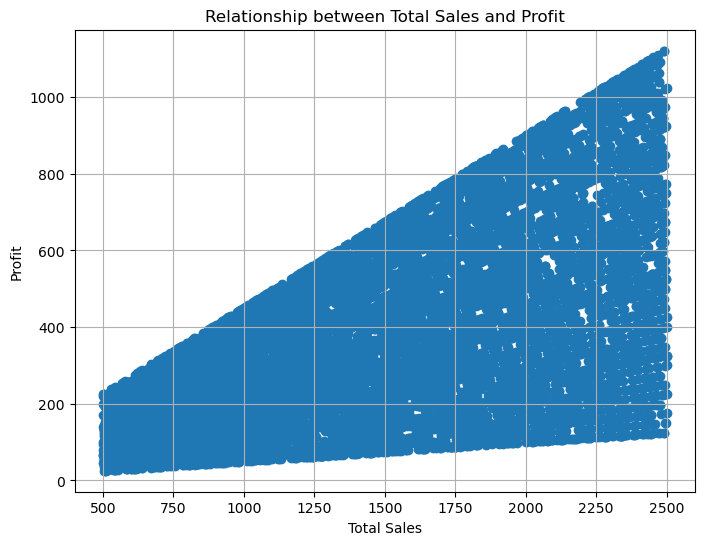

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(total_sales, profit)
plt.xlabel('Total Sales')
plt.ylabel('Profit')
plt.title('Relationship between Total Sales and Profit')
plt.grid(True)
plt.show()


what is the inference?

### 14. Can we identify any trends or patterns in customer buying behavior based on the day of the week?

In [85]:
avg_sales_by_weekday = df.groupby('weekday')['total_sales'].mean()


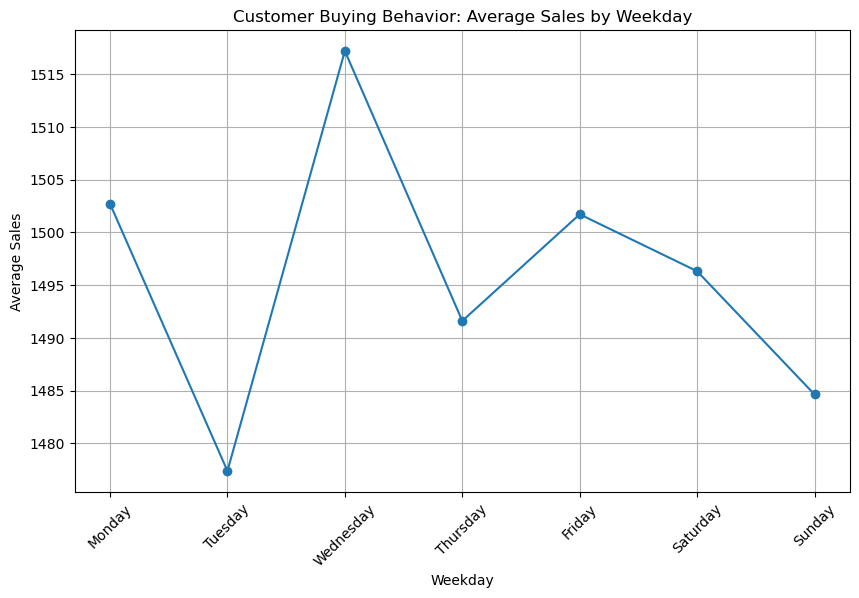

In [86]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_ticks = range(7)

plt.figure(figsize=(10, 6))
plt.plot(weekday_ticks, avg_sales_by_weekday, marker='o')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Customer Buying Behavior: Average Sales by Weekday')
plt.xticks(weekday_ticks, weekday_labels, rotation=45)
plt.grid(True)
plt.show()


### 15. What is the average discount offered across different categories and sub-categories?

In [87]:
avg_discount_by_category_subcategory = df.groupby(['category', 'sub_category'])['discount'].mean()


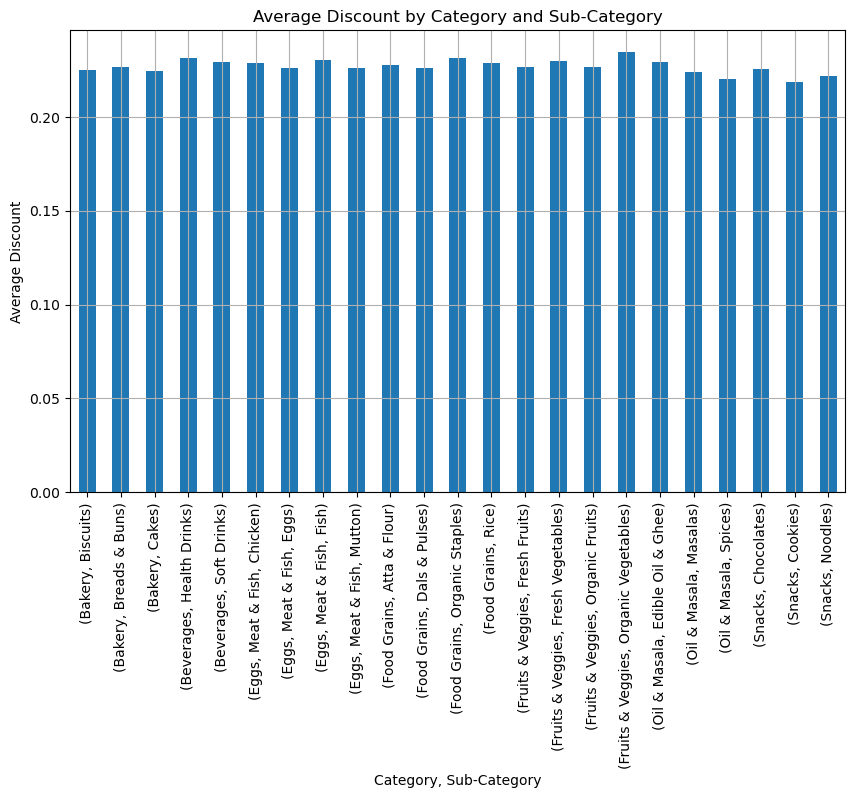

In [89]:
plt.figure(figsize=(10, 6))
avg_discount_by_category_subcategory.plot(kind='bar')
plt.xlabel('Category, Sub-Category')
plt.ylabel('Average Discount')
plt.title('Average Discount by Category and Sub-Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 16. Is there a correlation between the net sales and the discount amount?

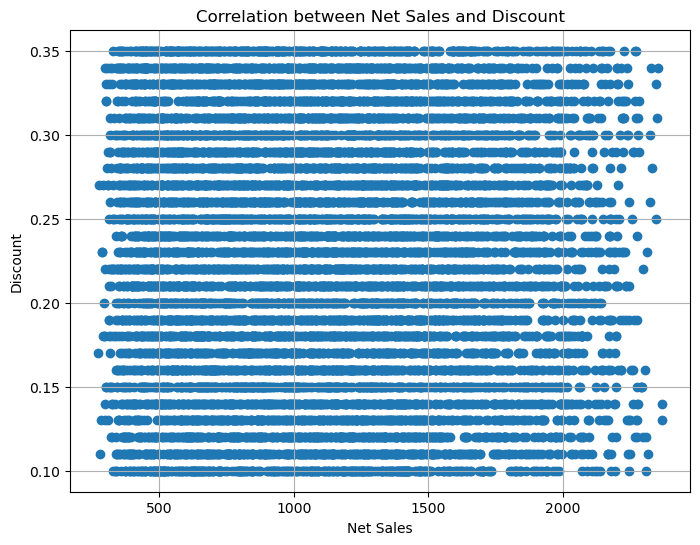

In [90]:
net_sales = df['net_sales']
discount = df['discount']
plt.figure(figsize=(8, 6))
plt.scatter(net_sales, discount)
plt.xlabel('Net Sales')
plt.ylabel('Discount')
plt.title('Correlation between Net Sales and Discount')
plt.grid(True)
plt.show()


### 17. Are there any notable differences in sales and profit between different years?

In [91]:
year = df['year']
sales = df['total_sales']
profit = df['profit']


In [92]:
sales_by_year = df.groupby('year')['total_sales'].sum()
profit_by_year = df.groupby('year')['profit'].sum()


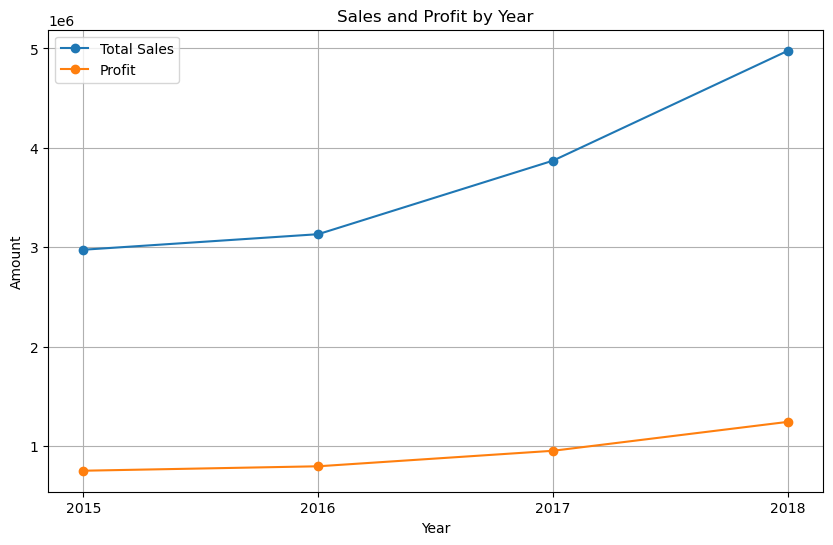

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year, marker='o', label='Total Sales')
plt.plot(profit_by_year.index, profit_by_year, marker='o', label='Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Sales and Profit by Year')
plt.xticks(sales_by_year.index)
plt.legend()
plt.grid(True)
plt.show()


### 18. How does the customer base vary across different regions and cities?

In [94]:
customer_counts = df.groupby(['region', 'city'])['customer_name'].nunique()


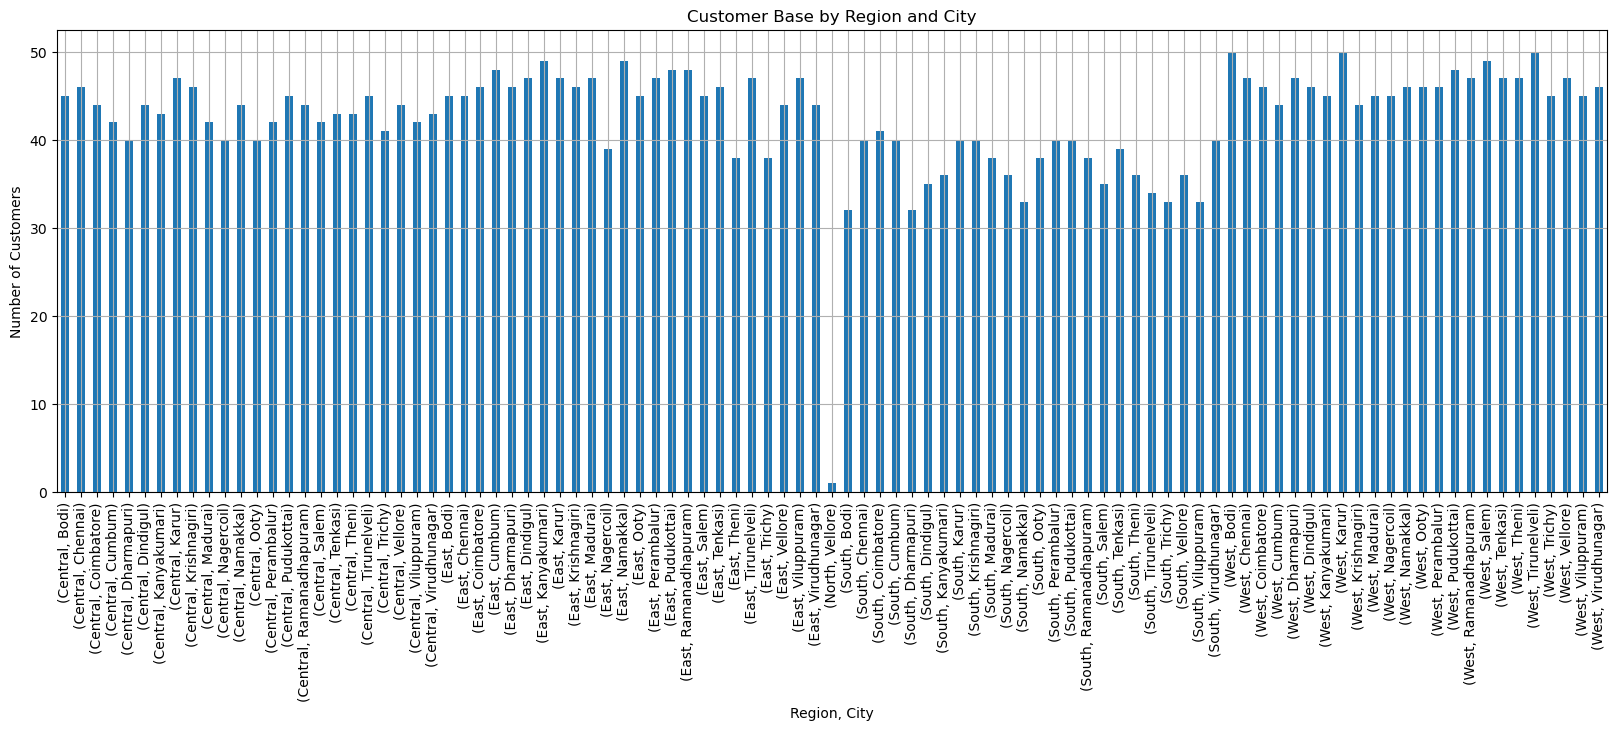

In [96]:
plt.figure(figsize=(20, 6))
customer_counts.plot(kind='bar')
plt.xlabel('Region, City')
plt.ylabel('Number of Customers')
plt.title('Customer Base by Region and City')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 19. Can we identify any underperforming categories or sub-categories that need improvement?

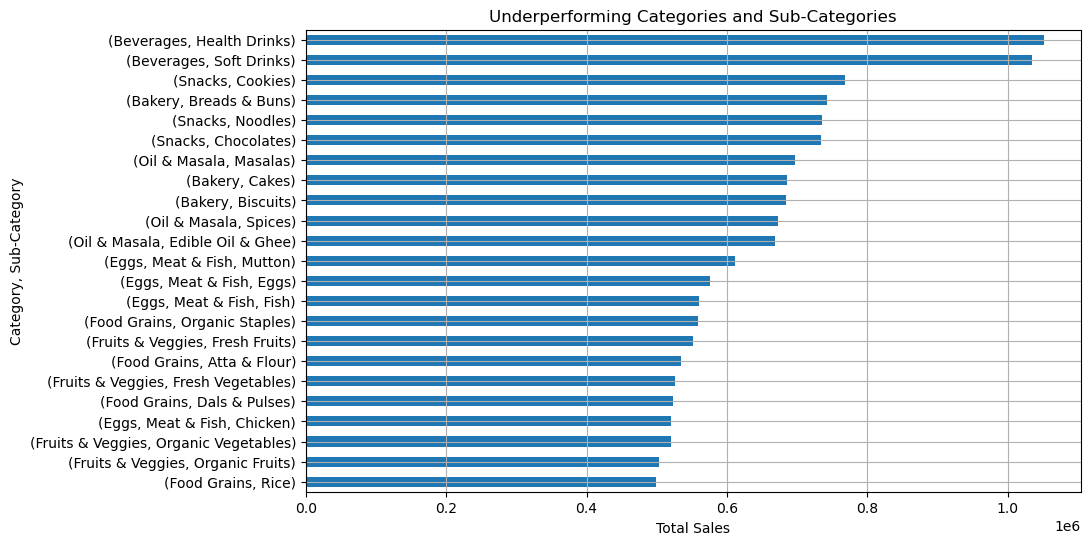

In [97]:
total_sales_by_category_subcategory = df.groupby(['category', 'sub_category'])['total_sales'].sum()
total_sales_by_category_subcategory = total_sales_by_category_subcategory.sort_values()
plt.figure(figsize=(10, 6))
total_sales_by_category_subcategory.plot(kind='barh')
plt.xlabel('Total Sales')
plt.ylabel('Category, Sub-Category')
plt.title('Underperforming Categories and Sub-Categories')
plt.grid(True)
plt.show()
